# MIE1624 Assignment 1 


In [1]:
#import libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import random
from scipy import stats
from sklearn.utils import resample
from scipy.stats import f_oneway 




In [2]:
df = pd.read_csv("clean_kaggle_data.csv") #read the dataset into python 3 

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (285) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.head() #Explore the dataset 

,Unnamed: 0,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
2,3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,5,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info() #explore the dataset 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15391 entries, 0 to 15390
Columns: 370 entries, Unnamed: 0 to Q38_B_OTHER
dtypes: float64(8), int64(3), object(359)
memory usage: 43.4+ MB


In [5]:
df.iloc[:,2:15].head() #explore the dataset with key columns 

,Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,NaN,NaN,NaN,NaN
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,C,C++,Java,NaN
2,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,NaN,C++,Java,NaN
3,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,NaN,NaN,NaN,NaN
4,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,NaN,C,NaN,NaN,NaN


# 1. Exploratory Data Analysis 

In [6]:
df.Q2.unique() #Explore all unique values in Q2 column 

array(['Man', 'Woman', 'Prefer not to say', 'Nonbinary',
       'Prefer to self-describe'], dtype=object)

In [7]:
#Modify Q2 column to make it simpler for latter analysis
df["Q2"] = df["Q2"].map({'Man':'Man', "Woman":"Woman"}).fillna("Other")

df.Q2.unique()

array(['Man', 'Woman', 'Other'], dtype=object)

In [8]:
# Explore all unique values in Q3 column 
df.Q3.unique()

array(['India', 'Indonesia', 'Pakistan', 'Mexico', 'Turkey', 'Australia',
       'Nigeria', 'Greece', 'Belgium', 'Egypt', 'Singapore', 'Brazil',
       'Poland', 'Iran, Islamic Republic of...', 'Japan', 'Italy',
       'United States of America', 'Viet Nam', 'Israel', 'China',
       'South Africa', 'Other', 'Bangladesh', 'Russia',
       'United Kingdom of Great Britain and Northern Ireland', 'France',
       'Tunisia', 'Argentina', 'I do not wish to disclose my location',
       'Colombia', 'Sweden', 'Chile', 'Saudi Arabia', 'Spain', 'Morocco',
       'Austria', 'Kenya', 'Canada', 'Ireland', 'Portugal',
       'Hong Kong (S.A.R.)', 'Ukraine', 'Denmark', 'Germany',
       'South Korea', 'Sri Lanka', 'Netherlands', 'Ghana', 'Malaysia',
       'Thailand', 'Nepal', 'Taiwan', 'Switzerland', 'Peru',
       'United Arab Emirates', 'Philippines', 'Algeria', 'Ethiopia',
       'Romania', 'Iraq', 'Ecuador', 'Kazakhstan', 'Uganda', 'Norway',
       'Belarus', 'Czech Republic'], dtype=object)

In [9]:
# Modify the country names to make it more clear and easy to analyze 
df.Q3 = df ['Q3'].map({'United States of America': "USA",
                         "Iran,Islamic Republic of..." : 'Iran',
                         'United Kingdom of Great Britain and Northern Ireland': "UK",
                         'I do not wish to disclose my location': "Not disclosed",
                         'United Arab Emirates': "UAE",
                         'Hong Kong (S.A.R.)' : "HK"}).fillna(df.Q3)
df.Q3

0              India
1          Indonesia
2           Pakistan
3             Mexico
4              India
            ...     
15386          India
15387    South Korea
15388          Egypt
15389         Sweden
15390          India
Name: Q3, Length: 15391, dtype: object

In [10]:
#Explore all unique values of Q4 column 
df.Q4.unique()

array(['Bachelor’s degree', 'Master’s degree', 'Doctoral degree',
       'I prefer not to answer', 'No formal education past high school',
       'Some college/university study without earning a bachelor’s degree',
       'Professional doctorate'], dtype=object)

In [11]:
#Modify Q4 column to make it simpler for latter analysis 
df["Q4"] = df["Q4"].map({'Bachelor’s degree':"Bachelor",
                        'Master’s degree' : "Master",
                        'Doctoral degree': "Doctoral",
                        'I prefer not to answer': "Not Disclosed",
                        'Some college/university study without earning a bachelor’s degree':"College",
                        'No formal education past high school': "High School",
                        'Professional doctorate': "Professional Doctorate"}).fillna(df['Q4'])

df.Q4

0        Bachelor
1          Master
2          Master
3        Doctoral
4        Doctoral
           ...   
15386    Bachelor
15387    Bachelor
15388    Bachelor
15389    Doctoral
15390    Bachelor
Name: Q4, Length: 15391, dtype: object

In [12]:
#Explore all unique values of Q5 column 
df.Q5.unique()

array(['Other', 'Program/Project Manager', 'Software Engineer',
       'Research Scientist', 'Data Scientist', 'Data Analyst',
       'Machine Learning Engineer', 'Business Analyst', 'Data Engineer',
       'Product Manager', 'Statistician', 'DBA/Database Engineer',
       'Developer Relations/Advocacy'], dtype=object)

In [13]:
#Explore all unique values of Q6 column 
df.Q6.unique()

array(['5-10 years', '20+ years', '1-3 years', '< 1 years', '10-20 years',
       '3-5 years', 'I have never written code'], dtype=object)

In [14]:
#Modify Q6 column 
df["Q6"] = df["Q6"].map({'I have never written code':"No Experience"}).fillna(df["Q6"])
df.Q6

0           5-10 years
1            20+ years
2            1-3 years
3            20+ years
4            < 1 years
             ...      
15386        1-3 years
15387       5-10 years
15388        1-3 years
15389    No Experience
15390    No Experience
Name: Q6, Length: 15391, dtype: object

In [15]:
#Explore Q25 column 
df.Q25.unique()

array([  30000,   70000,    1000,   40000,   20000,   80000,    3000,
         15000,    7500,   25000,    2000,  125000,   10000,    5000,
         50000,   60000,    4000,  500000,  250000,  150000,  300000,
         90000,  100000,  200000, 1000000])

In [16]:
#Extract key columns to create a new dataframe facilitate latter analysis
new_df = df[['Q1','Q2','Q3','Q4','Q5','Q6','Q25']]




In [17]:
#Rename columns
new_df.columns = ['Age Group','Gender','Country','Education','Title', 'Professional Experience','Yearly Compensation']

#Explore new_df 
new_df.head()





,Age Group,Gender,Country,Education,Title,Professional Experience,Yearly Compensation
0,50-54,Man,India,Bachelor,Other,5-10 years,30000
1,50-54,Man,Indonesia,Master,Program/Project Manager,20+ years,70000
2,22-24,Man,Pakistan,Master,Software Engineer,1-3 years,1000
3,45-49,Man,Mexico,Doctoral,Research Scientist,20+ years,40000
4,45-49,Man,India,Doctoral,Other,< 1 years,40000


In [18]:
#create a pivot table of # of people in data science community in each country by gender
gender_by_country = new_df.pivot_table(index = 'Country', columns = 'Gender',values ='Title',
aggfunc = 'count', fill_value = 0)

#calculate total 
gender_by_country['Total'] = gender_by_country.apply(np.sum,axis = 1)

#Explore created pivot table as described above 
gender_by_country.head()


#Sort country by the number of people working in data science in descending order 
gender_by_country.sort_values('Total',ascending = False, inplace = True)



### Plot Figure 1.1: Number of people working in data science in Top 15 countries by gender 

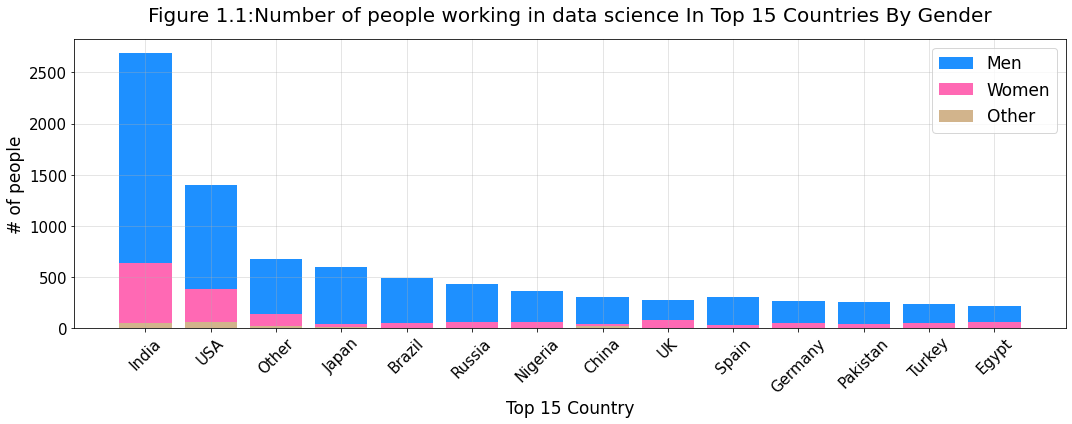

In [19]:
#Draw Figure 1.1 
fig, axis = plt.subplots(figsize = (15, 6))
axis.bar(gender_by_country.index[:14],gender_by_country['Man'][:14],color = "dodgerblue", label = "Men")
axis.bar(gender_by_country.index[:14],gender_by_country['Woman'][:14],color = "hotpink", label = "Women")
axis.bar(gender_by_country.index[:14],gender_by_country['Other'][:14], color = "tan", label = "Other")


#Formatting for Figure 1.1
plt.xticks(fontsize = 15, rotation = 45)
plt.yticks(fontsize = 15)
plt.xlabel("Top 15 Country", fontsize = 17)
plt.ylabel('# of people', fontsize = 17)
axis.legend(fontsize = 17)
plt.grid(alpha = 0.4)
plt.title("Figure 1.1:Number of people working in data science In Top 15 Countries By Gender", fontsize = 20, pad = 18)
plt.tight_layout()
plt.show()


In [20]:
print("I explore the number of data scientists in different countries (Top 15 here) and male to female ratio as data scientists in each country.\n")


print("From Figure 1.1, we see that India have most people working in data science community, followed by United States. In each Top 15 country, the number of men in data science are much more than the number of women in that aspect." )

I explore the number of data scientists in different countries (Top 15 here) and male to female ratio as data scientists in each country.

From Figure 1.1, we see that India have most people working in data science community, followed by United States. In each Top 15 country, the number of men in data science are much more than the number of women in that aspect.


In [21]:
#Exclude the group of 'Not Disclosed' (Group of 'Not Closed' only occupies 2%, excluding will not affect main results  )
df_edu = new_df[new_df['Education'] != 'Not Disclosed']

In [22]:
#create a table of average salary in each education level by gender 
education_salary = df_edu.pivot_table(index = 'Education', columns = 'Gender',
                                      values = 'Yearly Compensation', aggfunc = np.mean, fill_value = 0)

row_order = ['High School','College', 'Bachelor','Master', 'Doctoral', 'Professional Doctorate']

#reindex
education_salary = education_salary.reindex(row_order,axis=0)

education_salary = round(education_salary,2) # round it into 2 decimals 

education_salary


Gender,Man,Other,Woman
Education,,,
High School,34975.61,214400.00,26083.33
College,43999.22,22230.77,31338.54
Bachelor,37394.30,55381.36,23524.93
Master,54950.23,82198.28,38769.77
Doctoral,75505.36,91588.89,46664.16
Professional Doctorate,68952.91,216333.33,47385.25


### Plot Figure 1.2: Average Salary of Data Scientists in Different Education Levels By Gender (Men vs Women)

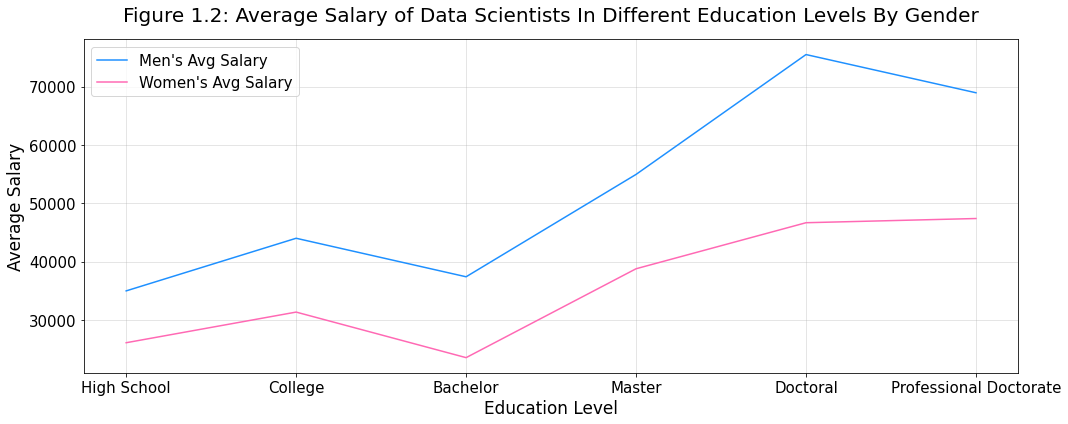

In [23]:
# Draw Figure 1.2 
# Since we are studying men vs women and the 'Other' Group only has few data points, the 'Other' group can be excluded 
# Here we assume doctoral and professional doctoral are different education levels 
fig, axis = plt.subplots(figsize = (15, 6))
axis.plot(education_salary.index,education_salary['Man'],color = "dodgerblue", label = "Men's Avg Salary")
axis.plot(education_salary.index,education_salary['Woman'],color = "hotpink", label = "Women's Avg Salary")


# Formatting for Figure 1.2 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
axis.set_xlabel("Education Level", fontsize = 17)
axis.set_ylabel('Average Salary', fontsize = 17)
axis.legend(fontsize = 15, loc = 2)
axis.legend(fontsize = 15)
axis.grid(alpha = 0.4)
plt.title("Figure 1.2: Average Salary of Data Scientists In Different Education Levels By Gender", fontsize = 20, pad = 18)
plt.tight_layout()
plt.show()

In [24]:
print("I explore the relationship between education level and salary by gender.\n")
print("From Figure 1.2, for people in different education levels, doctorals’ mean salary is higher than masters’ mean salary, masters’ mean salary is higher than bachelors’ mean salary (Focusing on above three groups since above three occupies 90% data).\n") 
print("Furthermore, within the same education level, men’s mean salary is higher than women’s mean salary. ")


I explore the relationship between education level and salary by gender.

From Figure 1.2, for people in different education levels, doctorals’ mean salary is higher than masters’ mean salary, masters’ mean salary is higher than bachelors’ mean salary (Focusing on above three groups since above three occupies 90% data).

Furthermore, within the same education level, men’s mean salary is higher than women’s mean salary. 


In [25]:
#Explore each level's value_counts in the education column
#Since # of Bachelor + Master + Doctoral occupies 90% of data, we can focus on these three groups to conduct main analysis 
#=fOCUS on analyzing Bechelor+Master+doctoral these three large groups will give us more direct and meaningful analysis results
df_edu['Education'].value_counts()

Master                    6799
Bachelor                  4777
Doctoral                  2217
College                    746
Professional Doctorate     290
High School                228
Name: Education, dtype: int64

In [26]:
#Create a table of average salary in each age group by gender 
age_salary = new_df.pivot_table(index = "Age Group", columns = 'Gender', values = "Yearly Compensation", aggfunc = np.mean, fill_value = 0)
age_salary = round (age_salary,2)
age_salary

Gender,Man,Other,Woman
Age Group,,,
18-21,18570.74,20687.50,4211.23
22-24,20501.80,41882.35,15560.91
25-29,29552.17,69221.15,24333.88
30-34,49040.06,82434.21,38696.78
35-39,61222.60,83700.00,46903.96
40-44,68662.74,113782.61,58293.99
45-49,86640.45,109500.00,48517.86
50-54,84874.81,43833.33,70841.58
55-59,98720.18,152800.00,76327.59


### Plot Figure 1.3: Average Salary Of Data Scientists In Age Groups By Gender (Men vs Women)

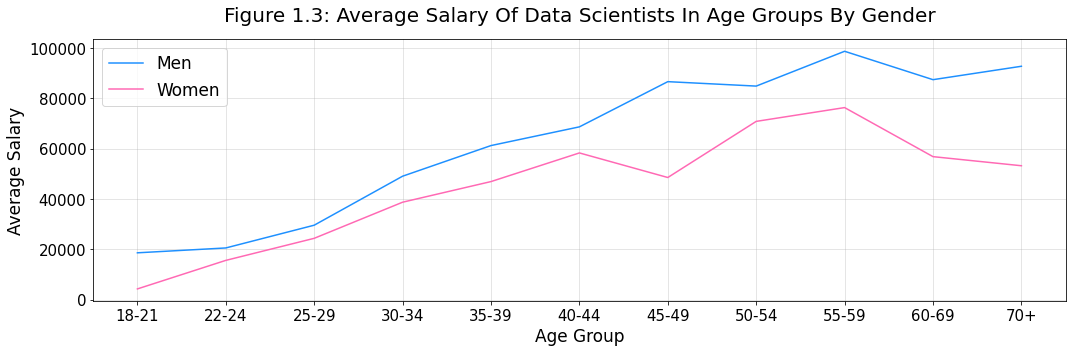

In [27]:
# Draw Figure 1.3 
# Since we are studying men vs women and the 'Other' Group only has few data points, the 'Other' group can be excluded in latter analysis 
fig, axis = plt.subplots(figsize = (15,5))
axis.plot(age_salary.index, age_salary['Man'], color = 'dodgerblue', alpha = 1, label = 'Men')
axis.plot(age_salary.index, age_salary['Woman'],color = 'hotpink', alpha = 1, label = 'Women')

#Formatting for Figure 1.3 
axis.legend(fontsize = 17)
axis.set_xlabel('Age Group', fontsize =17)
axis.set_ylabel('Average Salary', fontsize =17)
axis.grid(alpha = 0.4)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Figure 1.3: Average Salary Of Data Scientists In Age Groups By Gender', fontsize = 20, pad= 18)
plt.tight_layout()
plt.show()

In [28]:
print("I explore the relationship between age group and salary by gender.\n")
print("From Figure 1.3, within the same age group, men’s mean salary is higher than women’s mean salary.  In the age group of 45-49, the wage gap between men and women is largest. Both of women and men’s mean salary shows an upward trend overall with the age increase until 55 - 59.")


I explore the relationship between age group and salary by gender.

From Figure 1.3, within the same age group, men’s mean salary is higher than women’s mean salary.  In the age group of 45-49, the wage gap between men and women is largest. Both of women and men’s mean salary shows an upward trend overall with the age increase until 55 - 59.


# 2. Estimating the difference between average salary (Q25) of men vs women 

In [29]:
#extract all man oberservation into one series
male_col = new_df[new_df["Gender"] == "Man"]
#male_col

In [30]:
#Extract all woman observations into one series
female_col = new_df[new_df["Gender"]== "Woman"]
#female_col

In [31]:
#Check if exists null values 
male_col.isnull().sum() #no null values 

Age Group                  0
Gender                     0
Country                    0
Education                  0
Title                      0
Professional Experience    0
Yearly Compensation        0
dtype: int64

In [32]:
female_col.isnull().sum() #no null values

Age Group                  0
Gender                     0
Country                    0
Education                  0
Title                      0
Professional Experience    0
Yearly Compensation        0
dtype: int64

### 2.a: Compute and report descriptive statistics for each group (men vs women)

In [33]:
#2.a: Compute and report descriptive statistics for each group (men vs women)
Descriptive_statistics = pd.DataFrame([male_col['Yearly Compensation'].describe().values, 
                                      female_col['Yearly Compensation'].describe().values],
                                     columns = male_col["Yearly Compensation"].describe().index,
                                     index = ['Men', 'Women'])
Descriptive_statistics 

,count,mean,std,min,25%,50%,75%,max
Men,12642.0,51193.600696,99979.274378,1000.0,2000.0,20000.0,60000.0,1000000.0
Women,2482.0,34816.881547,72017.347888,1000.0,1000.0,7500.0,50000.0,1000000.0


In [34]:
print("In original sample, Men's mean salary: $51193.6 with the standard deviation: 99979.3; Women's mean salary: $34816.88 with the standard deviation: 72017.3.")

In original sample, Men's mean salary: $51193.6 with the standard deviation: 99979.3; Women's mean salary: $34816.88 with the standard deviation: 72017.3.


### 2.b If suitable, perform a two sample t-test with a 0.05 threhold. 

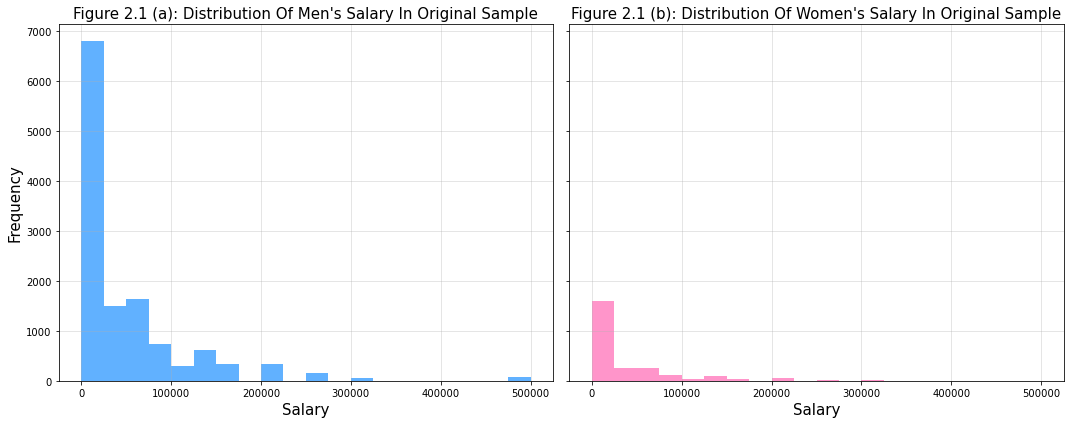

To check normality assumption for two orginal samples ae satisfied, we draw the Figure 2.1(a) and Figure 2.1(b).

As above histograms shown, both original samples of men's salary and women's salary do not follow normal distributions.

Since the normality assumption is violated, not all assumptions of t-test are satisfied. We cannot perform t-test on these two original samples.


In [35]:
#Before performing the t-test, check whether assumptions are satisfied 
# men's salary and women'salary are independent samples - > independence assumption satisfied 
#Check normality assumption 
#Draw distribution of men's salary and distribution of women' salary in orginal sample 
fig,(ax1, ax2) = plt.subplots(1,2, figsize=(15,6),sharey = True)
ax1.hist(male_col['Yearly Compensation'],bins=np.arange(0,500001,25000), color ="dodgerblue", alpha = 0.7, label = "Men")
ax2.hist(female_col['Yearly Compensation'],bins=np.arange(0,500001,25000), color = "hotpink", alpha = 0.7, label = "Women")


#Formatting 
ax1.set_title("Figure 2.1 (a): Distribution Of Men's Salary In Original Sample", fontsize = 15)
ax2.set_title("Figure 2.1 (b): Distribution Of Women's Salary In Original Sample", fontsize = 15)
ax1.set_ylabel("Frequency", fontsize = 15)
ax1.set_xlabel("Salary", fontsize = 15)
ax2.set_xlabel('Salary', fontsize = 15)
ax1.grid(alpha = 0.4)
ax2.grid(alpha = 0.4)
plt.tight_layout()
plt.show()

print("To check normality assumption for two orginal samples ae satisfied, we draw the Figure 2.1(a) and Figure 2.1(b).\n")
print("As above histograms shown, both original samples of men's salary and women's salary do not follow normal distributions.\n") 
print("Since the normality assumption is violated, not all assumptions of t-test are satisfied. We cannot perform t-test on these two original samples.")

### 2.c Bootstrap data for comparing the mean of salary (Q25) for two groups (women vs men)

In [36]:
#2.c Bootstrap data for comparing the mean of salary (Q25) for two groups (women vs men)

#self define a bootstrap function 
def bootstrap(col,iterations):
    mean_list = []
    
    for i in range(iterations):
        avg = np.mean(resample(col)) #resample with replacement and then calculate mean
        mean_list.append(avg) #append each mean
        
    return np.array(mean_list)

In [37]:
print("As seen in 2.b, both original samples for men and women do not follow normal distribution and not all assumptions for t-test are satisfied, we cannot perform t-test on these two original samples.\n")
print("Thus, we introduce bootstrapping this distribution-independent tool to further work on this so that we can draw inferences or estimate relavant statistics on relevant samples.")

As seen in 2.b, both original samples for men and women do not follow normal distribution and not all assumptions for t-test are satisfied, we cannot perform t-test on these two original samples.

Thus, we introduce bootstrapping this distribution-independent tool to further work on this so that we can draw inferences or estimate relavant statistics on relevant samples.


In [38]:
#do bootstrap for men and women's salary with 1000 replications 
male_bootstrap = bootstrap(male_col['Yearly Compensation'], 1000)
female_bootstrap = bootstrap(female_col['Yearly Compensation'], 1000)


In [39]:
print("To study the difference in average salary among men vs women, we choose the variable salary (Q25) and gender with two levels (women vs men).\n")
print("Then we draw the bootstrapped distribution for men's mean salary and women's mean salary.")

To study the difference in average salary among men vs women, we choose the variable salary (Q25) and gender with two levels (women vs men).

Then we draw the bootstrapped distribution for men's mean salary and women's mean salary.


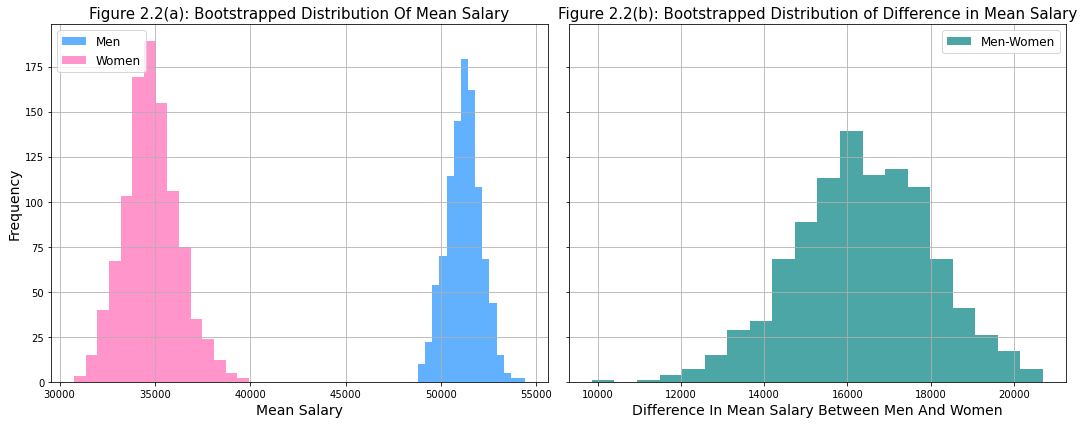

In [40]:
#plot 2 * 1 subplots 
fig,(ax1,ax2) = plt.subplots (1,2, figsize = (15,6),sharey = True)

#plot bootstrapped distribution for women and men's salary
ax1.hist(male_bootstrap, bins = 15, color ="dodgerblue", alpha = 0.7, label = "Men")
ax1.hist(female_bootstrap, bins = 15, color = "hotpink", alpha = 0.7, label = "Women")


#Formatting for plot of bootstrapped distribution
ax1.set_xlabel("Mean Salary", fontsize =14)
ax1.set_ylabel("Frequency", fontsize = 14)
ax1.set_title("Figure 2.2(a): Bootstrapped Distribution Of Mean Salary", fontsize = 15)
ax1.legend(fontsize = 12, loc =2)
ax1.grid()


#plot bootstrapped distriution of difference in mean salary for men and women 
ax2.hist(male_bootstrap - female_bootstrap, bins = 20, color = "teal", alpha = 0.7, label = "Men-Women")

#Formatting
ax2.set_xlabel('Difference In Mean Salary Between Men And Women',fontsize =14)
ax2.set_title("Figure 2.2(b): Bootstrapped Distribution of Difference in Mean Salary", fontsize = 15)
ax2.legend(fontsize= 12)
ax2.grid()
plt.tight_layout()
plt.show()

In [41]:
print("As above Figure 2.2 shown, both bootsrappped distributions of mean salary for men and women follow normal distributions.\n")
print("The bootstrapped distribution of difference in mean salary between men and women also follow normal distribution")

As above Figure 2.2 shown, both bootsrappped distributions of mean salary for men and women follow normal distributions.

The bootstrapped distribution of difference in mean salary between men and women also follow normal distribution


### 2.d If suitable, perform a two-sample t-test with a 0.05 threshold on the bootstrapped data

In [42]:
print("As previously illustrated, bootstrapped distribution of women' mean salary and bootstrapped distribution of men's mean salary follow normal distribution.\n")
print("Thus, the normality assumption is satisfied.\n")
print("The boostrapped sample for men's mean salary and bootstrapped sample for women's mean salary are also independent.\n")
print("Thus, the independence assumption is satisfied.\n")
print("All necessary assumptions for t-test are satisfied and we have iid distributions, we can perform two-sample t-test on bootstrapped data.")

As previously illustrated, bootstrapped distribution of women' mean salary and bootstrapped distribution of men's mean salary follow normal distribution.

Thus, the normality assumption is satisfied.

The boostrapped sample for men's mean salary and bootstrapped sample for women's mean salary are also independent.

Thus, the independence assumption is satisfied.

All necessary assumptions for t-test are satisfied and we have iid distributions, we can perform two-sample t-test on bootstrapped data.


In [43]:
#Perform a two-sample t-test with a 0.05 threshold on the bootstrapped data 
tstas, Pval1 = stats.ttest_ind(male_bootstrap,female_bootstrap, equal_var = False)

print("Threshold (alpha) = 0.05")
print("t-value: ", tstas)
print("p-value: ", Pval1, "\n")

print("Here the woman and man are two levels of variable gender, we choose to perform two-sample t-test to study whether mean salary of women and men are same.\n")
print("Given the 0.05 threshold, for this hypothesis testing, the null hypothesis is that men_mean_salary = women_mean_salary. The alternative hypothesis: men_mean_salary != women_mean_salary.\n")
print("For this two-sample t-test, the T-statistic is {0:.4f} and P value is {1:.4f}.\n".format(tstas, Pval1))
print("Since P value < 0.05, we reject the null hypothesis that men_mean_salary = women_mean_salary.")


Threshold (alpha) = 0.05
t-value:  307.9660258715997
p-value:  0.0 

Here the woman and man are two levels of variable gender, we choose to perform two-sample t-test to study whether mean salary of women and men are same.

Given the 0.05 threshold, for this hypothesis testing, the null hypothesis is that men_mean_salary = women_mean_salary. The alternative hypothesis: men_mean_salary != women_mean_salary.

For this two-sample t-test, the T-statistic is 307.9660 and P value is 0.0000.

Since P value < 0.05, we reject the null hypothesis that men_mean_salary = women_mean_salary.


In [44]:
#2.e Comment on the findings 

print("According to the results of performing t-test on bootstrapped data in 2.d, we can see that the P value for t-test is 0.0.\n ")
print("The null hypothesis for this t-test is that there is no difference in average salary between men and women.(mean_salary_men = mean_salary_women)\n")
print("Give a 0.05 threshold, since P value < 0.05, we reject the null hypothesis.\n")
print("We conclude that the difference in average salary between men and women is statistically significant.")





      
      




According to the results of performing t-test on bootstrapped data in 2.d, we can see that the P value for t-test is 0.0.
 
The null hypothesis for this t-test is that there is no difference in average salary between men and women.(mean_salary_men = mean_salary_women)

Give a 0.05 threshold, since P value < 0.05, we reject the null hypothesis.

We conclude that the difference in average salary between men and women is statistically significant.


# 3. Estimate the difference in average salary among bachelor, master and doctoral

In [45]:
#extract bachelor observations
bachelor_col = new_df[new_df['Education'] == "Bachelor"]

#extract master observations
master_col = new_df[new_df['Education'] == "Master"]

#extract doctoral observations 
doctoral_col = new_df[new_df['Education'] == "Doctoral"]



In [46]:
#Check if has null values 
bachelor_col.isnull().sum() #no null values 

Age Group                  0
Gender                     0
Country                    0
Education                  0
Title                      0
Professional Experience    0
Yearly Compensation        0
dtype: int64

In [47]:
master_col.isnull().sum() #no null values 

Age Group                  0
Gender                     0
Country                    0
Education                  0
Title                      0
Professional Experience    0
Yearly Compensation        0
dtype: int64

In [48]:
doctoral_col.isnull().sum() #no null values 

Age Group                  0
Gender                     0
Country                    0
Education                  0
Title                      0
Professional Experience    0
Yearly Compensation        0
dtype: int64

### 3.a Compute and report descriptive statistics for bachelor, master and doctoral 

In [49]:
#3.a Compute and report descriptive statistics for bachelor, master and doctoral 
Descriptive_statistics1 = pd.DataFrame([bachelor_col['Yearly Compensation'].describe().values,
                                      master_col['Yearly Compensation'].describe().values,
                                      doctoral_col['Yearly Compensation'].describe().values],
                                      columns =bachelor_col['Yearly Compensation'].describe().index,
                                      index = ['Bachelor','Master','Doctoral'])
Descriptive_statistics1

,count,mean,std,min,25%,50%,75%,max
Bachelor,4777.0,35578.291815,89382.060777,1000.0,1000.0,7500.0,40000.0,1000000.0
Master,6799.0,52706.868657,90928.786678,1000.0,3000.0,25000.0,70000.0,1000000.0
Doctoral,2217.0,70641.181777,117160.947589,1000.0,4000.0,40000.0,90000.0,1000000.0


In [50]:
print("In bootstrapped data, Bachalor's mean salary: 35578.29 with standard deviation: 89392.1, Master's mean salary: 52706.9 with standard deviation: 90928.8; Doctoral's mean salary: 117160.9 with standard deviation: 70641.2.")

In bootstrapped data, Bachalor's mean salary: 35578.29 with standard deviation: 89392.1, Master's mean salary: 52706.9 with standard deviation: 90928.8; Doctoral's mean salary: 117160.9 with standard deviation: 70641.2.


### 3.b If suitable, perform ANOVA for three groups (bachelor vs master vs doctoral)

In [51]:
#Check if all assumptions of ANOVA are satisfied. 
#Check independence assumption 
print("Original sample of bachalor's mean salary, sample of master's mean salary and sample of doctoral's mean salary are independent.\n")
print("Thus, independence assumption is satisfied.")


Original sample of bachalor's mean salary, sample of master's mean salary and sample of doctoral's mean salary are independent.

Thus, independence assumption is satisfied.


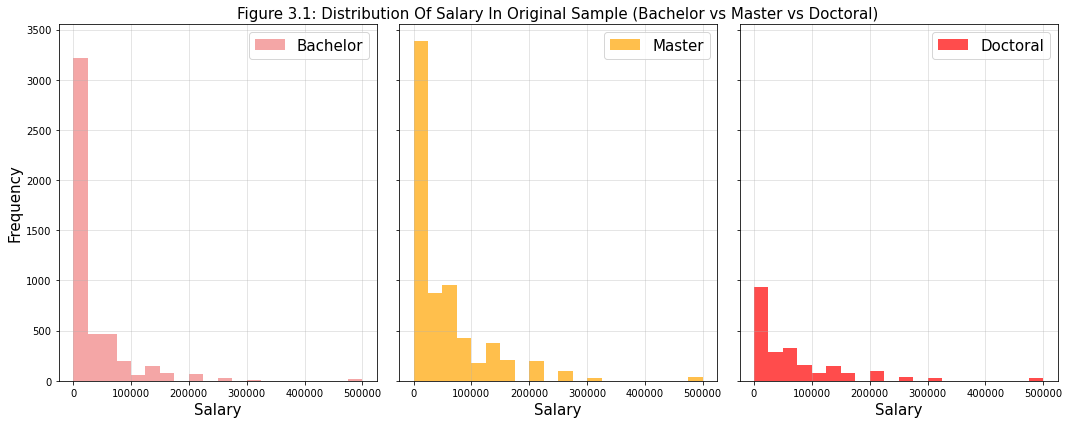

As Figure 3.1 shown, all original samples of bachelor's salary, master's salary and doctoral's salary do not follow normal distributions.

Since the normality assumption is violated, not all assumptions of ANOVA are satisfied. We cannot perform ANOVA test on these three original samples.


In [52]:
#Check if all assumptions of ANOVA are satisfied. 
#Check normality assumption 

fig,(ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,6),sharey = True)
ax1.hist(bachelor_col['Yearly Compensation'],bins=np.arange(0,500001,25000), color ="lightcoral", alpha = 0.7, label = "Bachelor")
ax2.hist(master_col['Yearly Compensation'],bins=np.arange(0,500001,25000), color = "orange", alpha = 0.7, label = "Master")
ax3.hist(doctoral_col['Yearly Compensation'],bins=np.arange(0,500001,25000), color = "red", alpha = 0.7, label = "Doctoral")

#Formatting 
ax2.set_title("Figure 3.1: Distribution Of Salary In Original Sample (Bachelor vs Master vs Doctoral)", fontsize = 15)
ax1.legend(fontsize = 15)
ax2.legend(fontsize = 15)
ax3.legend(fontsize = 15)
ax1.set_ylabel("Frequency", fontsize =15)
ax1.set_xlabel("Salary",fontsize = 15)
ax2.set_xlabel('Salary', fontsize = 15)
ax3.set_xlabel('Salary',fontsize = 15)

ax1.grid(alpha = 0.4)
ax2.grid(alpha = 0.4)
ax3.grid(alpha = 0.4)
plt.tight_layout()
plt.show()

print("As Figure 3.1 shown, all original samples of bachelor's salary, master's salary and doctoral's salary do not follow normal distributions.\n") 
print("Since the normality assumption is violated, not all assumptions of ANOVA are satisfied. We cannot perform ANOVA test on these three original samples.")

### 3.c Bootstrap data for comparing the mean of salary among three groups (bachelor vs master vs doctoral)

In [53]:
print("As seen in 3.b., since the three original samples for bachelor, master and doctoral do not follow normal distribution and not all assumptions for ANOVA are satisfied, we cannot perform ANOVA on original samples.\n")
print("Thus, we need to introduce bootstrapping this distribution-independent tool to work on this so that we can perform t-test and compare the mean salary among those three groups.")

As seen in 3.b., since the three original samples for bachelor, master and doctoral do not follow normal distribution and not all assumptions for ANOVA are satisfied, we cannot perform ANOVA on original samples.

Thus, we need to introduce bootstrapping this distribution-independent tool to work on this so that we can perform t-test and compare the mean salary among those three groups.


In [54]:
print("To study the difference in average salary among bachelor, master and doctoral, I choose to variable salary (Q25) and variable Education with three levels included (Bachelor vs Master vs Doctoral) to conduct further analysis.\n")


To study the difference in average salary among bachelor, master and doctoral, I choose to variable salary (Q25) and variable Education with three levels included (Bachelor vs Master vs Doctoral) to conduct further analysis.



In [55]:
#3.c Boostrap data for comparing the mean of salary among three groups (bachelor vs master vs doctoral)
bachelor_bootstrap = bootstrap(bachelor_col['Yearly Compensation'],1000)
master_bootstrap = bootstrap(master_col['Yearly Compensation'],1000)
doctoral_bootstrap = bootstrap(doctoral_col['Yearly Compensation'],1000)

In [56]:
print("Then we draw the bootstrapped distribution of bachelor's mean salary, master's mean salary and doctoral's mean salary.")

Then we draw the bootstrapped distribution of bachelor's mean salary, master's mean salary and doctoral's mean salary.


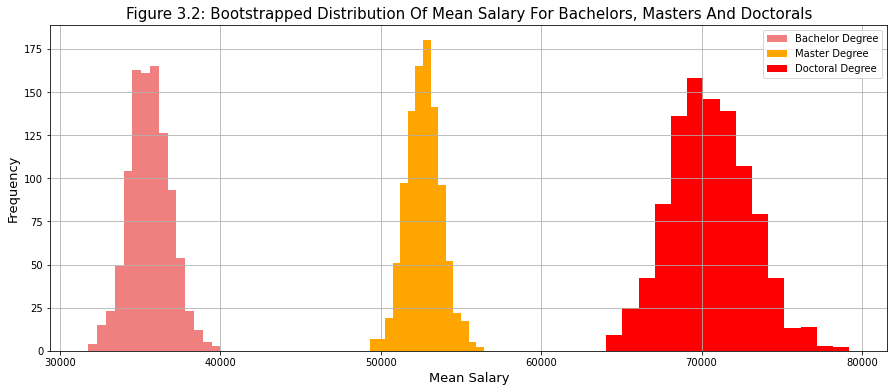

In [57]:
fig, axis = plt.subplots(figsize = (15,6))

#plot boostrapped distribution of mean salary for bachelor vs master vs doctoral 
axis.hist(bachelor_bootstrap, bins = 15, color = 'lightcoral', label = "Bachelor Degree")
axis.hist(master_bootstrap, bins = 15, color = 'orange', label = "Master Degree")
axis.hist(doctoral_bootstrap, bins =15, color = 'red', label = "Doctoral Degree")



axis.set_ylabel("Frequency",fontsize=13)
axis.set_xlabel("Mean Salary",fontsize=13)
axis.set_title('Figure 3.2: Bootstrapped Distribution Of Mean Salary For Bachelors, Masters And Doctorals', fontsize=15)
axis.legend(fontsize = 10)
axis.grid()

In [58]:
print("As seen in above Figure 3.2, bootstrapped distributions for bachelor, master and doctoral all follow normal distrbutions.") 

As seen in above Figure 3.2, bootstrapped distributions for bachelor, master and doctoral all follow normal distrbutions.


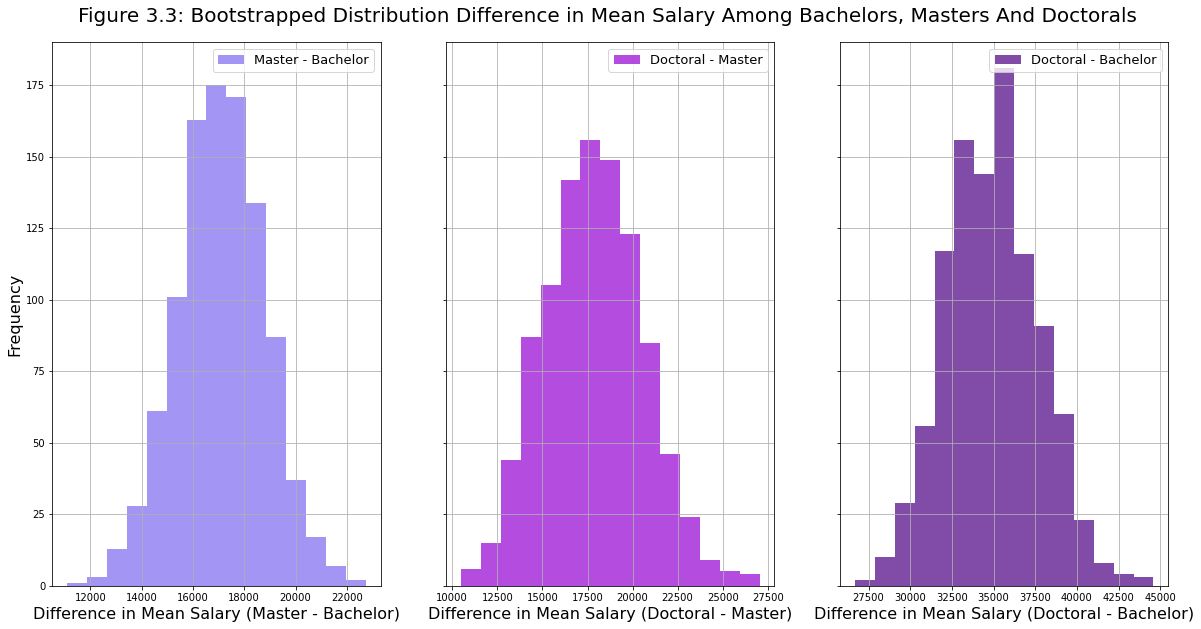

<Figure size 432x288 with 0 Axes>

In [59]:
#plot 1 * 3 subplots 
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (20,10),sharey = True)

#plot boostrapped distribution of difference in mean salary
ax1.hist(master_bootstrap - bachelor_bootstrap, bins = 15, color = "mediumslateblue", alpha =  0.7, label = "Master - Bachelor")
ax2.hist(doctoral_bootstrap - master_bootstrap, bins = 15, color = "darkviolet", alpha =  0.7, label = "Doctoral - Master")
ax3.hist(doctoral_bootstrap - bachelor_bootstrap, bins = 15, color = "indigo", alpha =  0.7, label = "Doctoral - Bachelor")

ax1.set_xlabel("Difference in Mean Salary (Master - Bachelor)", fontsize=16)
ax2.set_xlabel("Difference in Mean Salary (Doctoral - Master)", fontsize=16)
ax3.set_xlabel("Difference in Mean Salary (Doctoral - Bachelor)", fontsize=16)
ax1.set_ylabel('Frequency', fontsize =16)
ax2.set_title("Figure 3.3: Bootstrapped Distribution Difference in Mean Salary Among Bachelors, Masters And Doctorals ", fontsize=20, pad=20)

ax1.legend(fontsize = 13)
ax2.legend(fontsize = 13)
ax3.legend(fontsize = 13)

ax1.grid()
ax2.grid()
ax3.grid()

plt.show()
plt.tight_layout()



In [60]:
print("As seen in above Figure 3.3, all three bootstrapped distributions of difference in mean salary follow normal distributions.")

As seen in above Figure 3.3, all three bootstrapped distributions of difference in mean salary follow normal distributions.


### 3.d  If suitable, perform ANOVA with a 0.05 threshold on the bootstraped data 

In [61]:
#Check whether homogenity of variances are satisfied. 
#Check bootstrapped sample's standard deviation for bachelors 
bachelor_bootstrap.std()


1287.4083674321032

In [62]:
#Check bootstrapped sample's standard deviation for masters 
master_bootstrap.std()

1088.7477370086924

In [63]:
#Check bootstrapped sample's standard deviation for doctorals
doctoral_bootstrap.std()

2497.017280452452

In [64]:
print("Check homogenity of variances assumption:\n")
print('As seen in previous three numbers, the standard deviations of bootstrapped sample of mean salary for all three groups are within the same range (1000+ - 2000+) and approximately equal (As clarified and agreed by TA)\n')
print("Thus, the homogenity of variances assumption is satisfied.")

Check homogenity of variances assumption:

As seen in previous three numbers, the standard deviations of bootstrapped sample of mean salary for all three groups are within the same range (1000+ - 2000+) and approximately equal (As clarified and agreed by TA)

Thus, the homogenity of variances assumption is satisfied.


In [65]:
print("As previously illustrated in 3.c, all bootstrapped distribution bachelor's mean salary, master's salary and doctoral's salary follow normal distributions.\n")
print("Thus, normality assumption is satisfied.\n")
print("The bootstrapped sample of bachelor's mean salary, the boostrapped sample of master's mean salary and the bootstrapped sample of doctoral' mean salary are independent.\n")
print("Thus, the independence assumption is satisfied.\n")
print("The homogeneity of variances are also satisfied (Justified before).\n")
print("All assumptions for ANOVA are saitisfied, we can perform ANOVA test on these bootstrapped data.")

As previously illustrated in 3.c, all bootstrapped distribution bachelor's mean salary, master's salary and doctoral's salary follow normal distributions.

Thus, normality assumption is satisfied.

The bootstrapped sample of bachelor's mean salary, the boostrapped sample of master's mean salary and the bootstrapped sample of doctoral' mean salary are independent.

Thus, the independence assumption is satisfied.

The homogeneity of variances are also satisfied (Justified before).

All assumptions for ANOVA are saitisfied, we can perform ANOVA test on these bootstrapped data.


In [66]:
#3.d Perform ANOVA with a 0.05 threshold on the bootstraped data 
Fstas, Pval2 = f_oneway(bachelor_bootstrap, master_bootstrap, doctoral_bootstrap)

print("Threshold (alpha) = 0.05")
print("F-value: ", Fstas)
print("p-value: ", Pval2,)
print("Null hypothesis: ","bachelor_mean_salary = master_mean_salary = doctoral_mean_salary\n" )


print("Here the bachelor, master and doctoral are the three levels of the independent variable: Education, thus, I choose to perform one-way ANOVA on these three groups. The salary variable is the variable of interest.\n")
print("For the hypothesis testing, the null hypothesis is that there is no difference in average salary among bachelors, masters and doctorals.\n")
print("Alternative Hypothesis: At least of bachelor_mean_salary, or master_mean_salary or doctoral_mean_salary is different.\n")
print("Given 0.05 threshold,for this one-way ANOVA, the F-statistic is {0:.4f} and the P value is {1:.4f}\n".format(Fstas, Pval2))  
print("Since P value < 0.05, we reject the null hypothesis.\n")


Threshold (alpha) = 0.05
F-value:  100765.60677654856
p-value:  0.0
Null hypothesis:  bachelor_mean_salary = master_mean_salary = doctoral_mean_salary

Here the bachelor, master and doctoral are the three levels of the independent variable: Education, thus, I choose to perform one-way ANOVA on these three groups. The salary variable is the variable of interest.

For the hypothesis testing, the null hypothesis is that there is no difference in average salary among bachelors, masters and doctorals.

Alternative Hypothesis: At least of bachelor_mean_salary, or master_mean_salary or doctoral_mean_salary is different.

Given 0.05 threshold,for this one-way ANOVA, the F-statistic is 100765.6068 and the P value is 0.0000

Since P value < 0.05, we reject the null hypothesis.



### 3.e Comment on the findings 

In [67]:
print("According to the results of performing ANOVA on bootstrapped data, we get the P value = 0.0.\n")
print("The null hypothesis for this ANOVA is that there is no difference in mean salary among bachelors, masters and doctorals.\n")
print("Given a 0.05 threshold, since P value << 0.05, we have the strong evidence to reject the null hypothesis\n")
print("We conclude that at least one education group from bachelors, masters and doctorals has statistically significant different average salary than the others.\n")     

      
      

According to the results of performing ANOVA on bootstrapped data, we get the P value = 0.0.

The null hypothesis for this ANOVA is that there is no difference in mean salary among bachelors, masters and doctorals.

Given a 0.05 threshold, since P value << 0.05, we have the strong evidence to reject the null hypothesis

We conclude that at least one education group from bachelors, masters and doctorals has statistically significant different average salary than the others.

